# Classification 

### George Tzanetakis, University of Victoria 

In this notebook we go over the terminology of classification using some simple examples utilizing 
the scikit-learn framework for machine learning in Python. The first example based on images of digits is directly from a scikit-learn tutorial and the second example is based on audio feature extraction and genre classification. 

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
# We have 1797 instances of digits stored as 8x8=64 pixel images. These images are directly used as features. 
print(digits.data.shape)
# 
print(digits.data) 
# the 10th instance 
print(digits.data[10])

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [5]:
# target contains the ground truth labels for each digit 
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [6]:
# we can use classifier to train a model for predicting the digit 
# of an 8 by 8 image 

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

# as a simple example we train using all the data except the last image 
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# we can predict the last instance and the result is the number 8 
print(clf.predict(digits.data[-1:]))
# predicit instance number gives as the number 1 as the prediction 
print(clf.predict([digits.data[1]]))



[8]
[1]


Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


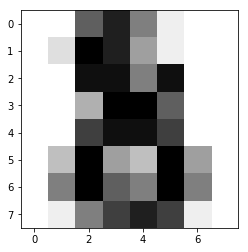

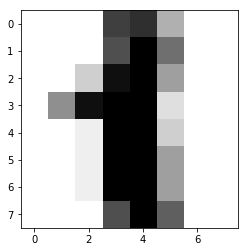

In [9]:
import matplotlib.pyplot as plt
%pylab inline

plt.imshow(digits.images[-1:][0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.figure()
plt.imshow(digits.images[1:][0], cmap=plt.cm.gray_r, interpolation='nearest')


In [11]:
import glob
import librosa
import numpy as np

fnames = glob.glob("/Users/gtzan/data/sound/genres44k/*/*.wav")

genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']

# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 40))
target = np.zeros(len(fnames))

# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            mfcc_matrix = librosa.feature.mfcc(y=audio, sr=srate)
            mean_mfcc = np.mean(mfcc_matrix,axis=1)
            std_mfcc = np.std(mfcc_matrix, axis=1)
            audio_fvec = np.hstack([mean_mfcc, std_mfcc])
            audio_features[i] = audio_fvec
            target[i] = label

print(audio_features.shape)



Processing 0 /Users/gtzan/data/sound/genres44k/pop/pop.00027.wav
Processing 1 /Users/gtzan/data/sound/genres44k/pop/pop.00033.wav
Processing 2 /Users/gtzan/data/sound/genres44k/pop/pop.00032.wav
Processing 3 /Users/gtzan/data/sound/genres44k/pop/pop.00026.wav
Processing 4 /Users/gtzan/data/sound/genres44k/pop/pop.00030.wav
Processing 5 /Users/gtzan/data/sound/genres44k/pop/pop.00024.wav
Processing 6 /Users/gtzan/data/sound/genres44k/pop/pop.00018.wav
Processing 7 /Users/gtzan/data/sound/genres44k/pop/pop.00019.wav
Processing 8 /Users/gtzan/data/sound/genres44k/pop/pop.00025.wav
Processing 9 /Users/gtzan/data/sound/genres44k/pop/pop.00031.wav
Processing 10 /Users/gtzan/data/sound/genres44k/pop/pop.00009.wav
Processing 11 /Users/gtzan/data/sound/genres44k/pop/pop.00035.wav
Processing 12 /Users/gtzan/data/sound/genres44k/pop/pop.00021.wav
Processing 13 /Users/gtzan/data/sound/genres44k/pop/pop.00020.wav
Processing 14 /Users/gtzan/data/sound/genres44k/pop/pop.00034.wav
Processing 15 /Users

Processing 123 /Users/gtzan/data/sound/genres44k/metal/metal.00041.wav
Processing 124 /Users/gtzan/data/sound/genres44k/metal/metal.00055.wav
Processing 125 /Users/gtzan/data/sound/genres44k/metal/metal.00054.wav
Processing 126 /Users/gtzan/data/sound/genres44k/metal/metal.00040.wav
Processing 127 /Users/gtzan/data/sound/genres44k/metal/metal.00068.wav
Processing 128 /Users/gtzan/data/sound/genres44k/metal/metal.00097.wav
Processing 129 /Users/gtzan/data/sound/genres44k/metal/metal.00083.wav
Processing 130 /Users/gtzan/data/sound/genres44k/metal/metal.00095.wav
Processing 131 /Users/gtzan/data/sound/genres44k/metal/metal.00081.wav
Processing 132 /Users/gtzan/data/sound/genres44k/metal/metal.00056.wav
Processing 133 /Users/gtzan/data/sound/genres44k/metal/metal.00042.wav
Processing 134 /Users/gtzan/data/sound/genres44k/metal/metal.00043.wav
Processing 135 /Users/gtzan/data/sound/genres44k/metal/metal.00057.wav
Processing 136 /Users/gtzan/data/sound/genres44k/metal/metal.00080.wav
Proces

Processing 239 /Users/gtzan/data/sound/genres44k/disco/disco.00018.wav
Processing 240 /Users/gtzan/data/sound/genres44k/disco/disco.00024.wav
Processing 241 /Users/gtzan/data/sound/genres44k/disco/disco.00030.wav
Processing 242 /Users/gtzan/data/sound/genres44k/disco/disco.00026.wav
Processing 243 /Users/gtzan/data/sound/genres44k/disco/disco.00032.wav
Processing 244 /Users/gtzan/data/sound/genres44k/disco/disco.00033.wav
Processing 245 /Users/gtzan/data/sound/genres44k/disco/disco.00027.wav
Processing 246 /Users/gtzan/data/sound/genres44k/disco/disco.00023.wav
Processing 247 /Users/gtzan/data/sound/genres44k/disco/disco.00037.wav
Processing 248 /Users/gtzan/data/sound/genres44k/disco/disco.00036.wav
Processing 249 /Users/gtzan/data/sound/genres44k/disco/disco.00022.wav
Processing 250 /Users/gtzan/data/sound/genres44k/disco/disco.00008.wav
Processing 251 /Users/gtzan/data/sound/genres44k/disco/disco.00034.wav
Processing 252 /Users/gtzan/data/sound/genres44k/disco/disco.00020.wav
Proces

Processing 355 /Users/gtzan/data/sound/genres44k/blues/blues.00037.wav
Processing 356 /Users/gtzan/data/sound/genres44k/blues/blues.00012.wav
Processing 357 /Users/gtzan/data/sound/genres44k/blues/blues.00006.wav
Processing 358 /Users/gtzan/data/sound/genres44k/blues/blues.00007.wav
Processing 359 /Users/gtzan/data/sound/genres44k/blues/blues.00013.wav
Processing 360 /Users/gtzan/data/sound/genres44k/blues/blues.00005.wav
Processing 361 /Users/gtzan/data/sound/genres44k/blues/blues.00011.wav
Processing 362 /Users/gtzan/data/sound/genres44k/blues/blues.00039.wav
Processing 363 /Users/gtzan/data/sound/genres44k/blues/blues.00038.wav
Processing 364 /Users/gtzan/data/sound/genres44k/blues/blues.00010.wav
Processing 365 /Users/gtzan/data/sound/genres44k/blues/blues.00004.wav
Processing 366 /Users/gtzan/data/sound/genres44k/blues/blues.00028.wav
Processing 367 /Users/gtzan/data/sound/genres44k/blues/blues.00000.wav
Processing 368 /Users/gtzan/data/sound/genres44k/blues/blues.00014.wav
Proces

Processing 469 /Users/gtzan/data/sound/genres44k/reggae/reggae.00012.wav
Processing 470 /Users/gtzan/data/sound/genres44k/reggae/reggae.00038.wav
Processing 471 /Users/gtzan/data/sound/genres44k/reggae/reggae.00004.wav
Processing 472 /Users/gtzan/data/sound/genres44k/reggae/reggae.00010.wav
Processing 473 /Users/gtzan/data/sound/genres44k/reggae/reggae.00011.wav
Processing 474 /Users/gtzan/data/sound/genres44k/reggae/reggae.00005.wav
Processing 475 /Users/gtzan/data/sound/genres44k/reggae/reggae.00039.wav
Processing 476 /Users/gtzan/data/sound/genres44k/reggae/reggae.00089.wav
Processing 477 /Users/gtzan/data/sound/genres44k/reggae/reggae.00062.wav
Processing 478 /Users/gtzan/data/sound/genres44k/reggae/reggae.00076.wav
Processing 479 /Users/gtzan/data/sound/genres44k/reggae/reggae.00077.wav
Processing 480 /Users/gtzan/data/sound/genres44k/reggae/reggae.00063.wav
Processing 481 /Users/gtzan/data/sound/genres44k/reggae/reggae.00088.wav
Processing 482 /Users/gtzan/data/sound/genres44k/re

Processing 576 /Users/gtzan/data/sound/genres44k/classical/classical.00058.wav
Processing 577 /Users/gtzan/data/sound/genres44k/classical/classical.00064.wav
Processing 578 /Users/gtzan/data/sound/genres44k/classical/classical.00070.wav
Processing 579 /Users/gtzan/data/sound/genres44k/classical/classical.00071.wav
Processing 580 /Users/gtzan/data/sound/genres44k/classical/classical.00065.wav
Processing 581 /Users/gtzan/data/sound/genres44k/classical/classical.00059.wav
Processing 582 /Users/gtzan/data/sound/genres44k/classical/classical.00073.wav
Processing 583 /Users/gtzan/data/sound/genres44k/classical/classical.00067.wav
Processing 584 /Users/gtzan/data/sound/genres44k/classical/classical.00098.wav
Processing 585 /Users/gtzan/data/sound/genres44k/classical/classical.00099.wav
Processing 586 /Users/gtzan/data/sound/genres44k/classical/classical.00066.wav
Processing 587 /Users/gtzan/data/sound/genres44k/classical/classical.00072.wav
Processing 588 /Users/gtzan/data/sound/genres44k/cla

Processing 692 /Users/gtzan/data/sound/genres44k/rock/rock.00037.wav
Processing 693 /Users/gtzan/data/sound/genres44k/rock/rock.00023.wav
Processing 694 /Users/gtzan/data/sound/genres44k/rock/rock.00009.wav
Processing 695 /Users/gtzan/data/sound/genres44k/rock/rock.00035.wav
Processing 696 /Users/gtzan/data/sound/genres44k/rock/rock.00021.wav
Processing 697 /Users/gtzan/data/sound/genres44k/rock/rock.00020.wav
Processing 698 /Users/gtzan/data/sound/genres44k/rock/rock.00034.wav
Processing 699 /Users/gtzan/data/sound/genres44k/rock/rock.00008.wav
Processing 700 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00022.wav
Processing 701 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00036.wav
Processing 702 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00037.wav
Processing 703 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00023.wav
Processing 704 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00009.wav
Processing 705 /Users/gtzan/data/sound/genres44k/hiphop/hiphop.00035.wav
Processing

Processing 805 /Users/gtzan/data/sound/genres44k/country/country.00089.wav
Processing 806 /Users/gtzan/data/sound/genres44k/country/country.00048.wav
Processing 807 /Users/gtzan/data/sound/genres44k/country/country.00074.wav
Processing 808 /Users/gtzan/data/sound/genres44k/country/country.00060.wav
Processing 809 /Users/gtzan/data/sound/genres44k/country/country.00061.wav
Processing 810 /Users/gtzan/data/sound/genres44k/country/country.00075.wav
Processing 811 /Users/gtzan/data/sound/genres44k/country/country.00049.wav
Processing 812 /Users/gtzan/data/sound/genres44k/country/country.00071.wav
Processing 813 /Users/gtzan/data/sound/genres44k/country/country.00065.wav
Processing 814 /Users/gtzan/data/sound/genres44k/country/country.00059.wav
Processing 815 /Users/gtzan/data/sound/genres44k/country/country.00058.wav
Processing 816 /Users/gtzan/data/sound/genres44k/country/country.00064.wav
Processing 817 /Users/gtzan/data/sound/genres44k/country/country.00070.wav
Processing 818 /Users/gtz

Processing 916 /Users/gtzan/data/sound/genres44k/jazz/jazz.00013.wav
Processing 917 /Users/gtzan/data/sound/genres44k/jazz/jazz.00007.wav
Processing 918 /Users/gtzan/data/sound/genres44k/jazz/jazz.00006.wav
Processing 919 /Users/gtzan/data/sound/genres44k/jazz/jazz.00012.wav
Processing 920 /Users/gtzan/data/sound/genres44k/jazz/jazz.00075.wav
Processing 921 /Users/gtzan/data/sound/genres44k/jazz/jazz.00061.wav
Processing 922 /Users/gtzan/data/sound/genres44k/jazz/jazz.00049.wav
Processing 923 /Users/gtzan/data/sound/genres44k/jazz/jazz.00048.wav
Processing 924 /Users/gtzan/data/sound/genres44k/jazz/jazz.00060.wav
Processing 925 /Users/gtzan/data/sound/genres44k/jazz/jazz.00074.wav
Processing 926 /Users/gtzan/data/sound/genres44k/jazz/jazz.00062.wav
Processing 927 /Users/gtzan/data/sound/genres44k/jazz/jazz.00076.wav
Processing 928 /Users/gtzan/data/sound/genres44k/jazz/jazz.00089.wav
Processing 929 /Users/gtzan/data/sound/genres44k/jazz/jazz.00088.wav
Processing 930 /Users/gtzan/data/s

In [12]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_predict

clf = svm.SVC(gamma='scale', kernel='linear')
clf.fit(audio_features, target)
predicted = cross_val_predict(clf, audio_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:

# perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)

Confusion matrix:
[[89  1  1  0  8  0  0  1  0  0]
 [ 2 61  4  0  4  8 11  5  4  1]
 [ 1  9 52  9  0 12  3  7  6  1]
 [ 0  2  9 62  0  3  3 16  1  4]
 [ 7  6  2  0 76  6  2  1  0  0]
 [ 0  7 17  4  3 41 17  4  1  6]
 [ 0 18  8  1  9  8 46  2  0  8]
 [ 1  8  9 22  1  5  7 40  6  1]
 [ 0  4 10  5  2  2  0  4 73  0]
 [ 0  2  4  7  0  9  1  1  0 76]]
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
0.616



In [16]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("\nClassification accuracy:%s\n"
      % (metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[88  1  1  0  9  0  0  1  0  0]
 [ 2 61  4  0  4  8  9  7  4  1]
 [ 1 11 48 12  0 13  4  4  6  1]
 [ 0  4  9 64  0  4  2 13  0  4]
 [ 8  4  1  0 76  6  3  2  0  0]
 [ 0  6 16  6  5 39 14  6  2  6]
 [ 0 15  8  2 12  8 44  4  0  7]
 [ 1 12 10 25  1  3  5 37  5  1]
 [ 0  4 12  5  2  2  1  2 72  0]
 [ 0  3  4  4  0  9  1  1  1 77]]

Classification accuracy:0.606



In [62]:
import random 
i = random.randint(0, 1000)
predicted_label = int(clf.predict([audio_features[i]]))
print("Prediction for %d %s is %s"% (i, fnames[i], genres[predicted_label]))


Prediction for 451 /Users/gtzan/data/sound/genres44k/reggae/reggae.00025.wav is reggae


In [63]:
import IPython.display as ipd

# I know that for this file the prediction is wrong 
i = 398 
predicted_label = int(clf.predict([audio_features[i]]))
print("Prediction for %s is %s"% (fnames[i], genres[predicted_label]))
# Lets listen to it 
audio, srate = librosa.load(fnames[i])
ipd.Audio(audio, rate =srate)

Prediction for /Users/gtzan/data/sound/genres44k/blues/blues.00075.wav is hiphop


Before ending this notebook I would like to mention how impressive it is that with a few lines of Python code and the right libraries we were able to do a full music genre classification system. Twenty years ago building such a system required many lines of C++ code and formed a large part of my PhD thesis which was completed in 2002. The journal article describing this work called "Musical Genre Classification of Audio Signal" is considered a classic paper in MIR. 